In [169]:
# For version check
from platform import python_version
from importlib.metadata import version

In [170]:
from functools import reduce, partial
from collections import defaultdict

from ete3 import Tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Search for gene ids 
## Human

In [73]:
! wget https://ftp.ncbi.nlm.nih.gov/gene/DATA/gene_info.gz -P ../data/08_GO_gene_subset/annotation/
! zcat ../data/08_GO_gene_subset/annotation/gene_info.gz | awk '$1 == 9606' > ../data/08_GO_gene_subset/ages_lists/human_genes_info.txt

In [260]:
human_gene_info = pd.read_csv('../data/08_GO_gene_subset/ages_lists/human_genes_info.txt', sep='\t',
                              header=None)
human_gene_info = human_gene_info[[1, 2, 4]]
human_gene_info.rename(columns = {1:'GeneID', 2: 'Symbol', 4: 'Synonyms'}, inplace = True)

In [261]:
# load GRM, add geneID to dataframe
human_GRN = pd.read_csv('../data/06_swiss_tree_blast/human_results/human_GRN_BLAST.csv')

# remove rows with unknown age
human_GRN.dropna(subset=['Tf_age', 'Tg_age'], inplace=True)
human_GRN.drop_duplicates(inplace=True)

genes_human = set(human_GRN.TF)
genes_human.update(human_GRN.Target)

In [262]:
# Add GeneIDs to gene names:
human_genes = pd.DataFrame({'Symbol': list(genes_human)})

human_genes['GeneID'] = human_genes.merge(human_gene_info, how='left', on=['Symbol']).GeneID

human_gene_info_synon = human_gene_info.loc[human_gene_info['Synonyms'] != '-']
human_gene_info_synon.loc[:,'Synonyms'] = human_gene_info_synon.loc[:,'Synonyms'].str.split('|')

/tmp/ipykernel_10338/136255577.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_gene_info_synon.loc[:,'Synonyms'] = human_gene_info_synon.loc[:,'Synonyms'].str.split('|')


In [263]:
na_genes = list(human_genes[human_genes['GeneID'].isna()].Symbol)
gene2id_dict = dict()

for index, row in human_gene_info_synon.iterrows():
    for gene in row['Synonyms']:
        if gene in na_genes:
            if gene not in gene2id_dict:
                gene2id_dict[gene] = row['GeneID']
            else:
                print(row['GeneID'], ':\t\t', gene)
                
for gene in gene2id_dict:
    human_genes.loc[human_genes['Symbol'] == gene, 'GeneID'] = gene2id_dict[gene]

In [264]:
# search for stil unknown gene id in https://david.ncifcrf.gov/conversion.jsp
# from list(human_gene_ages[human_gene_ages['GeneID'].isna()].Symbol)
# result in ../data/08_GO_gene_subset/ages_lists/conv_human.txt

# ! cat ../data/08_GO_gene_subset/ages_lists/conv_human.txt | awk '{print $1, $2}' > ../data/08_GO_gene_subset/ages_lists/conv_human_2col.txt

human_na_results = {}

with open('../data/08_GO_gene_subset/ages_lists/conv_human_2col.txt') as f:
    for line in f:
        (key, val) = line.split()
        human_na_results[key] = val

        
for gene in human_na_results:
    if gene == 'From':
        continue
    human_genes.loc[human_genes['Symbol'] == gene, 'GeneID'] = human_na_results[gene]

In [ ]:
human_genes.GeneID = human_genes.GeneID.astype(int)
#human_genes.to_csv('../data/08_GO_gene_subset/ages_lists/human_genes_id.csv', index=False)

In [266]:
human_genes = pd.read_csv('../data/08_GO_gene_subset/ages_lists/human_genes_id.csv')

In [268]:
human_genes

,Symbol,GeneID
0,NAB1,4664
1,EGLN2,112398
2,XIAP,331
3,ACRV1,56
4,TXNIP,10628
...,...,...
2827,POLR3D,3767
2828,CCR3,661
2829,GLS,1232
2830,SPRR2A,2744


In [325]:
# subset to try method
#human_subset = human_genes.sample(n=100)
#human_subset.Symbol.to_csv('../data/08_GO_gene_subset/ages_lists/human_subset_genes.list', header=None, index=None)

## Mouse

In [82]:
! zcat ../data/08_GO_gene_subset/annotation/gene_info.gz | awk '$1 == 10090' > ../data/08_GO_gene_subset/ages_lists/mouse_genes_info.txt

In [326]:
mouse_gene_info = pd.read_csv('../data/08_GO_gene_subset/ages_lists/mouse_genes_info.txt', sep='\t',
                              header=None)
mouse_gene_info = mouse_gene_info[[1, 2, 4]]
mouse_gene_info.rename(columns = {1:'GeneID', 2: 'Symbol', 4: 'Synonyms'}, inplace = True)

In [606]:
# load GRM, add geneID to dataframe
mouse_GRN = pd.read_csv('../data/06_swiss_tree_blast/mouse_results/mouse_GRN_BLAST.csv')

# remove rows with unknown age
mouse_GRN.dropna(subset=['Tf_age', 'Tg_age'], inplace=True) 
mouse_GRN.drop_duplicates(inplace=True)

genes_mouse = set(mouse_GRN.TF)
genes_mouse.update(mouse_GRN.Target)

In [328]:
# Add GeneIDs to gene names:
mouse_genes = pd.DataFrame({'Symbol': list(genes_mouse)})

mouse_genes['GeneID'] = mouse_genes.merge(mouse_gene_info, how='left', on=['Symbol']).GeneID

mouse_gene_info_synon = mouse_gene_info.loc[mouse_gene_info['Synonyms'] != '-']
mouse_gene_info_synon.loc[:,'Synonyms'] = mouse_gene_info_synon.loc[:,'Synonyms'].str.split('|')

/tmp/ipykernel_4679/3764015127.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse_gene_info_synon.loc[:,'Synonyms'] = mouse_gene_info_synon.loc[:,'Synonyms'].str.split('|')


In [329]:
na_genes = list(mouse_genes[mouse_genes['GeneID'].isna()].Symbol)
gene2id_dict = dict()

for index, row in mouse_gene_info_synon.iterrows():
    for gene in row['Synonyms']:
        if gene in na_genes:
            if gene not in gene2id_dict:
                gene2id_dict[gene] = row['GeneID']
            else:
                print(row['GeneID'], ':\t\t', gene)
                
for gene in gene2id_dict:
    mouse_genes.loc[mouse_genes['Symbol'] == gene, 'GeneID'] = gene2id_dict[gene]

In [330]:
mouse_genes.GeneID = mouse_genes.GeneID.astype(int)
#mouse_genes.to_csv('../data/08_GO_gene_subset/ages_lists/mouse_genes_id.csv', index=False)

In [269]:
mouse_genes = pd.read_csv('../data/08_GO_gene_subset/ages_lists/mouse_genes_id.csv')

In [331]:
# subset to try method
#mouse_subset = mouse_genes.sample(n=100)
#mouse_subset.Symbol.to_csv('../data/08_GO_gene_subset/ages_lists/mouse_subset_genes.list', header=None, index=None)

# 1. GO tree search
## 1.1. Create GO-genes base

In [436]:
# Recursively find all the parent and child terms of the term

def transitive_closure(go_term, go):
    go_term_set = set()
    find_parents(go_term, go, go_term_set)
    find_children(go_term, go, go_term_set)
    return go_term_set
    
def find_parents(term1, go, go_term_set={}, ret=False):
    for term2 in term1.parents:
        go_term_set.update({term2})
        
        # Recurse on term to find all parents
        find_parents(term2, go, go_term_set) 
        
    if(ret):
        return go_term_set

def find_children(term1, go, go_term_set={}, ret=False):
    for term2 in term1.children:
        go_term_set.update({term2})
        
        # Recurse on term to find all children
        find_children(term2, go, go_term_set)
        
    if(ret):
        return go_term_set

In [565]:
# Load Associations
from __future__ import print_function
from goatools.anno.genetogo_reader import Gene2GoReader
from goatools.base import download_ncbi_associations

# Import the OBO parser from GOATools
from goatools import obo_parser

fin_gene2go = download_ncbi_associations()

    
# create a dictionary of the GO terms, 
# using the obo_parser from GOATools
#! wget http://current.geneontology.org/ontology/go-basic.obo -P ../data/08_GO_gene_subset/annotation/
    
go_base = obo_parser.GODag('../data/08_GO_gene_subset/annotation/go-basic.obo')

  EXISTS: gene2go
../data/08_GO_gene_subset/annotation/go-basic.obo: fmt(1.2) rel(2022-07-01) 47,008 Terms


### 1.1.1. Human

GOTools tutorial [link](https://nbviewer.org/urls/dessimozlab.github.io/go-handbook/GO%20Tutorial%20in%20Python%20-%20Solutions.ipynb).

- Level refers to the length of the shortest path from the top.
- Depth refers to the length of the longest path from the top.

In [571]:
# Read NCBI's gene2go. Store annotations in a list of namedtuples
objanno_human = Gene2GoReader(fin_gene2go, taxids=[9606])

# Get namespace2association where:
#    namespace is:
#        BP: biological_process               
#        MF: molecular_function
#        CC: cellular_component
#    assocation is a dict:
#        key: NCBI GeneID
#        value: A set of GO IDs associated with that gene

ns2assoc_human = objanno_human.get_ns2assc()

for nspc, id2gos in ns2assoc_human.items():
    print("{NS} {N:,} annotated human genes".format(NS=nspc, N=len(id2gos)))

HMS:0:00:03.332828 350,116 annotations, 20,727 genes, 18,978 GOs, 1 taxids READ: gene2go 
MF 18,265 annotated human genes
CC 19,760 annotated human genes
BP 18,707 annotated human genes


In [572]:
# Select only genes that exsist in GRN:
human_gene_list = human_genes.GeneID
BP_ns2assoc_human = dict((k, ns2assoc_human['BP'][k]) for k in human_gene_list if k in ns2assoc_human['BP'])

# Create dict GO - genes
# Dict structure GO_genes_dict (nested dictionary): {level: int, depth: int, genes: set()}

GO_genes_dict_human = dict()

for gene in BP_ns2assoc_human:
    for term in BP_ns2assoc_human[gene]:
        go_term = go_base[term]
        go_term_set = set([go_term])
        
        find_parents(go_term, go_base, go_term_set)
        
        for term_parents in go_term_set:
            
            if term_parents.id not in GO_genes_dict_human:
                # add {Level, Depth}
                GO_genes_dict_human[term_parents.id] = {'level': term_parents.level, 
                                                        'depth': term_parents.depth,
                                                        'genes': set()}
            # add genes
            GO_genes_dict_human[term_parents.id]['genes'].update({gene})

### 1.1.2 Mouse

In [573]:
# Read NCBI's gene2go. Store annotations in a list of namedtuples
objanno_mouse = Gene2GoReader(fin_gene2go, taxids=[10090])

# Get namespace2association where:
#    namespace is:
#        BP: biological_process               
#        MF: molecular_function
#        CC: cellular_component
#    assocation is a dict:
#        key: NCBI GeneID
#        value: A set of GO IDs associated with that gene

ns2assoc_mouse = objanno_mouse.get_ns2assc()

for nspc, id2gos in ns2assoc_mouse.items():
    print("{NS} {N:,} annotated mouse genes".format(NS=nspc, N=len(id2gos)))

HMS:0:00:05.732936 434,879 annotations, 29,857 genes, 19,025 GOs, 1 taxids READ: gene2go 
MF 17,526 annotated mouse genes
CC 19,486 annotated mouse genes
BP 18,879 annotated mouse genes


In [574]:
# Select only genes that exsist in GRN:
mouse_gene_list = mouse_genes.GeneID
BP_ns2assoc_mouse = dict((k, ns2assoc_mouse['BP'][k]) for k in mouse_gene_list if k in ns2assoc_mouse['BP'])

# Create dict GO - genes
# Dict structure GO_genes_dict (nested dictionary): {level: int, depth: int, genes: set()}

GO_genes_dict_mouse = dict()

for gene in BP_ns2assoc_mouse:
    for term in BP_ns2assoc_mouse[gene]:
        go_term = go_base[term]
        go_term_set = set([go_term])
        
        find_parents(go_term, go_base, go_term_set)
        
        for term_parents in go_term_set:
            
            if term_parents.id not in GO_genes_dict_mouse:
                # add {Level, Depth}
                GO_genes_dict_mouse[term_parents.id] = {'level': term_parents.level, 
                                                        'depth': term_parents.depth,
                                                        'genes': set()}
            # add genes
            GO_genes_dict_mouse[term_parents.id]['genes'].update({gene})

## 1.2. Calculate metric for GO terms

In [201]:
def select_subnet(gene_set, full_network, mode='both'):
    # Return subGRN from full FRN using genes set
    # mode: 'both', 'tf', 'target'
    if mode == 'both':
        return full_network[(full_network['TF_ID'].isin(gene_set)) & (full_network['Target_ID'].isin(gene_set))]
    if mode == 'tf':
        return full_network[full_network['TF_ID'].isin(gene_set)]
    if mode == 'target':
        return full_network[full_network['Target_ID'].isin(gene_set)]
    
    
def distance_calculation(network, max_distance):
    # Create pandas.core.series.Series with % distances relation
    # max_distance - number of possible distances in full GRN    
    if network.shape[0] != 0:
        empty_res = pd.Series([0] * 7)
        counts = pd.Series(network['age_length'].value_counts(normalize=True) * 100)
        adder = partial(pd.Series.add, fill_value=0)
        result = reduce(adder, [empty_res, counts])
        return result
    
    else:
        return None

### 1.2.1. Human

In [273]:
# Load full GRN
human_GRN = pd.read_csv('../data/06_swiss_tree_blast/human_results/human_GRN_BLAST.csv')
human_GRN.dropna(subset=['Tf_age', 'Tg_age'], inplace=True) 
human_GRN.drop_duplicates(inplace=True)

# Ages into integers
classes = ['no info', 'cellular organisms', 'Eukaryota', 'Opisthokonta',  'Eumetazoa', 
           'Vertebrata', 'Mammalia', 'Primates']

human_GRN['Tg_age_int'] = human_GRN['Tg_age'].apply(lambda x: classes.index(x))
human_GRN['TF_age_int'] = human_GRN['Tf_age'].apply(lambda x: classes.index(x))


human_GRN['age_length'] = np.where((human_GRN['TF_age_int'] == 0) | (human_GRN['Tg_age_int'] == 0),
                                    -1,
                                    abs(human_GRN['TF_age_int'] - human_GRN['Tg_age_int']))

# check 'no info' values
human_GRN[human_GRN.age_length == -1]

,TF,Target,Mode,PMID,Tf_age,Tg_age,Tg_age_int,TF_age_int,age_length


In [274]:
#Add GeneID to GRN
human_genes.rename(columns = {'Symbol':'TF'}, inplace=True)

human_GRN = human_GRN.merge(human_genes, how='left')

human_GRN.rename(columns = {'GeneID':'TF_ID'}, inplace=True)
human_genes.rename(columns = {'TF':'Target'}, inplace=True)

human_GRN = human_GRN.merge(human_genes, how='left')

human_genes.rename(columns = {'Target':'Symbol'}, inplace=True)
human_GRN.rename(columns = {'GeneID':'Target_ID'}, inplace=True)

human_GRN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9326 entries, 0 to 9325
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TF          9326 non-null   object
 1   Target      9326 non-null   object
 2   Mode        9326 non-null   object
 3   PMID        9326 non-null   object
 4   Tf_age      9326 non-null   object
 5   Tg_age      9326 non-null   object
 6   Tg_age_int  9326 non-null   int64 
 7   TF_age_int  9326 non-null   int64 
 8   age_length  9326 non-null   int64 
 9   TF_ID       9326 non-null   int64 
 10  Target_ID   9326 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 874.3+ KB


In [277]:
# human_GRN.to_csv('../data/08_GO_gene_subset/ages_lists/human_GRN_iddistances.csv', index=False)

In [579]:
# Create dataframe with distance metric
# select small GRN for GO term - сontains only GO terms with more than 10 genes.

human_result_df = pd.DataFrame(columns = ["GO_term", "Level", "Depth",
                                          "Genes_number", "Edges_number",
                                          0, 1, 2, 3, 4, 5, 6])
#human_result_df[human_result_df.columns[1:5]] = human_result_df.iloc[:, 1:5].astype('int')
#human_result_df[human_result_df.columns[5:]] = human_result_df.iloc[:, 5:].astype('float')

for term in GO_genes_dict_human:
    if len(GO_genes_dict_human[term]['genes']) > 10:
        temp_GRN = select_subnet(GO_genes_dict_human[term]['genes'], human_GRN)
        max_distance = human_GRN.age_length.max()
        distance_series = distance_calculation(temp_GRN, max_distance)
        
        if distance_series is not None:
            temp_row = [term, 
                        GO_genes_dict_human[term]['level'], 
                        GO_genes_dict_human[term]['depth'],
                        len(GO_genes_dict_human[term]['genes']), 
                        temp_GRN.shape[0]]
            temp_row.extend(distance_series.tolist())
            human_result_df.loc[term] = temp_row
            
human_result_df

,GO_term,Level,Depth,Genes_number,Edges_number,0,1,2,3,4,5,6
GO:0001958,GO:0001958,4,4,16,1,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
GO:0008150,GO:0008150,0,0,2801,9225,20.975610,27.013550,28.043360,16.921409,5.875339,1.084011,0.086721
GO:0032501,GO:0032501,1,1,958,2242,23.193577,26.895629,29.527208,15.254237,4.415700,0.713649,0.000000
GO:0036075,GO:0036075,3,3,16,1,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
GO:0001503,GO:0001503,2,2,52,21,28.571429,28.571429,38.095238,4.761905,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
GO:0007266,GO:0007266,6,8,12,1,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GO:1905898,GO:1905898,5,7,14,1,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
GO:0008631,GO:0008631,5,7,11,1,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GO:0001836,GO:0001836,7,7,12,11,54.545455,36.363636,0.000000,9.090909,0.000000,0.000000,0.000000


### 1.2.2. Mouse

In [278]:
# Load full GRN
mouse_GRN = pd.read_csv('../data/06_swiss_tree_blast/mouse_results/mouse_GRN_BLAST.csv')
mouse_GRN.dropna(subset=['Tf_age', 'Tg_age'], inplace=True) 
mouse_GRN.drop_duplicates(inplace=True)

# Ages into integers
classes = ['no info', 'cellular organisms', 'Eukaryota', 'Opisthokonta',  'Eumetazoa',
           'Vertebrata', 'Amniota', 'Rodentia']

mouse_GRN['Tg_age_int'] = mouse_GRN['Tg_age'].apply(lambda x: classes.index(x))
mouse_GRN['TF_age_int'] = mouse_GRN['Tf_age'].apply(lambda x: classes.index(x))


mouse_GRN['age_length'] = np.where((mouse_GRN['TF_age_int'] == 0) | (mouse_GRN['Tg_age_int'] == 0),
                                    -1,
                                    abs(mouse_GRN['TF_age_int'] - mouse_GRN['Tg_age_int']))

print(f'max lenght: {mouse_GRN["age_length"].max()}')

# check 'no info' values
mouse_GRN[mouse_GRN.age_length == -1]

max lenght: 6


,TF,Target,Mode,PMID,Tf_age,Tg_age,Tg_age_int,TF_age_int,age_length


In [279]:
#Add GeneID to GRN
mouse_genes.rename(columns = {'Symbol':'TF'}, inplace=True)

mouse_GRN = mouse_GRN.merge(mouse_genes, how='left')

mouse_GRN.rename(columns = {'GeneID':'TF_ID'}, inplace=True)
mouse_genes.rename(columns = {'TF':'Target'}, inplace=True)

mouse_GRN = mouse_GRN.merge(mouse_genes, how='left')

mouse_genes.rename(columns = {'Target':'Symbol'}, inplace=True)
mouse_GRN.rename(columns = {'GeneID':'Target_ID'}, inplace=True)

mouse_GRN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6931 entries, 0 to 6930
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TF          6931 non-null   object
 1   Target      6931 non-null   object
 2   Mode        6931 non-null   object
 3   PMID        6931 non-null   object
 4   Tf_age      6931 non-null   object
 5   Tg_age      6931 non-null   object
 6   Tg_age_int  6931 non-null   int64 
 7   TF_age_int  6931 non-null   int64 
 8   age_length  6931 non-null   int64 
 9   TF_ID       6931 non-null   int64 
 10  Target_ID   6931 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 649.8+ KB


In [282]:
#mouse_GRN.to_csv('../data/08_GO_gene_subset/ages_lists/mouse_GRN_iddistances.csv', index=False)

In [258]:
# Create dataframe with distance metric
# select small GRN for GO term - сontains only GO terms with more than 10 genes.

mouse_result_df = pd.DataFrame(columns = ["GO_term", "Level", "Depth",
                                          "Genes_number", "Edges_number",
                                          0, 1, 2, 3, 4, 5, 6])
max_distance = mouse_GRN.age_length.max()

for term in GO_genes_dict_mouse:
    if len(GO_genes_dict_mouse[term]['genes']) > 10:
        temp_GRN = select_subnet(GO_genes_dict_mouse[term]['genes'], mouse_GRN)
        distance_series = distance_calculation(temp_GRN, max_distance)
        
        if distance_series is not None:
            temp_row = [term, 
                        GO_genes_dict_mouse[term]['level'], 
                        GO_genes_dict_mouse[term]['depth'],
                        len(GO_genes_dict_mouse[term]['genes']), 
                        temp_GRN.shape[0]]
            temp_row.extend(distance_series.tolist())
            
            mouse_result_df.loc[term] = temp_row

NameError: name 'GO_genes_dict_mouse' is not defined

## 1.3.  Plot results
### 1.3.1. Human

In [533]:
human_result_df.drop(['Depth'], axis=1).groupby('Level').mean()

,Genes_number,Edges_number,0,1,2,3,4,5,6
Level,,,,,,,,,
0,2801.000000,9225.000000,20.975610,27.013550,28.043360,16.921409,5.875339,1.084011,0.086721
1,751.555556,1928.944444,19.832483,25.633150,29.689068,18.052240,4.106010,2.664676,0.022372
2,295.871287,519.702970,30.304904,25.370963,21.485228,15.729740,5.818178,1.280369,0.010620
3,176.187279,276.848057,29.805885,26.098560,22.637036,15.364658,5.011342,1.075152,0.007366
4,127.610000,192.114000,32.201405,24.670090,21.804994,15.481942,4.972192,0.857460,0.011917
5,90.048253,123.650582,29.924764,23.125841,22.085333,16.688353,6.575718,1.599130,0.000860
6,68.023904,79.868526,33.061544,22.554040,20.602240,15.864070,6.699614,1.217624,0.000867
7,63.988462,76.261538,36.868972,20.968049,18.599836,15.822336,6.219926,1.519127,0.001754
8,62.094340,78.660377,38.171793,20.390915,17.699460,15.042976,7.880237,0.813719,0.000900


<Figure size 432x288 with 0 Axes>

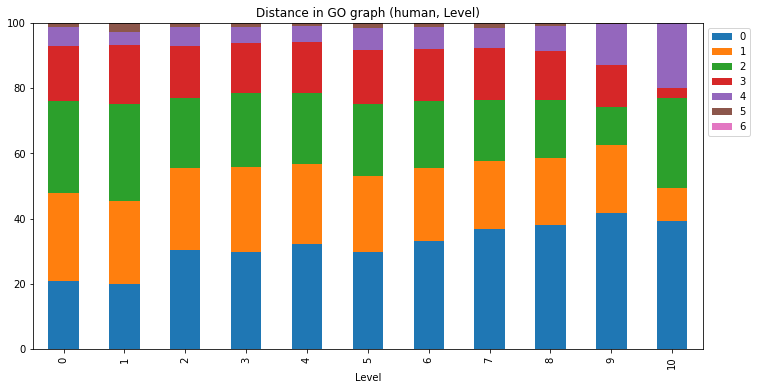

In [593]:
fig = plt.figure()

ax = human_result_df.drop(['Depth', 'Genes_number', 'Edges_number'], axis=1
                    ).groupby('Level', as_index=False).mean().plot.bar(
    x='Level', 
    stacked=True, 
    title='Distance in GO graph (human, Level)',
    figsize=(12,6))

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0, 100)

ax.figure.savefig('../data/08_GO_gene_subset/plots/human_level.png')

In [534]:
human_result_df.drop(['Level'], axis=1).groupby('Depth').mean()

,Genes_number,Edges_number,0,1,2,3,4,5,6
Depth,,,,,,,,,
0,2801.000000,9225.000000,20.975610,27.013550,28.043360,16.921409,5.875339,1.084011,0.086721
1,751.555556,1928.944444,19.832483,25.633150,29.689068,18.052240,4.106010,2.664676,0.022372
2,350.210526,639.578947,30.774598,23.890448,22.206921,15.760321,6.479329,0.875181,0.013201
3,212.765306,366.581633,29.935384,26.259741,22.396746,15.657601,4.893290,0.848890,0.008348
4,162.495652,267.649275,31.800572,24.873012,22.523207,15.141669,4.687707,0.955060,0.018772
5,115.580336,172.100719,30.818074,22.928167,22.594601,16.990667,5.640295,1.027022,0.001174
6,77.218962,83.514673,32.181731,22.514436,23.244587,15.124983,5.801586,1.131853,0.000824
7,55.553846,43.082051,30.601993,23.536256,19.564188,17.594859,6.994844,1.706891,0.000970
8,47.472924,39.902527,36.098577,22.702986,17.274624,15.468612,6.833681,1.621265,0.000253


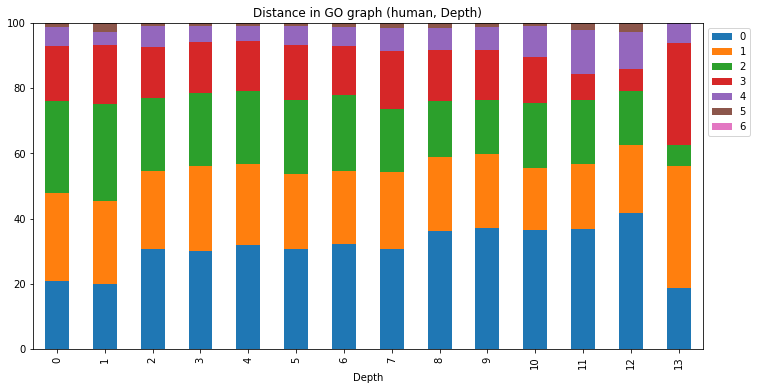

In [594]:
ax = human_result_df.drop(['Level', 'Genes_number', 'Edges_number'], axis=1
                    ).groupby('Depth', as_index=False).mean().plot.bar(
    x='Depth', 
    stacked=True, 
    title='Distance in GO graph (human, Depth)',
    figsize=(12,6))

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0, 100)

ax.figure.savefig('../data/08_GO_gene_subset/plots/human_depth.png')

### 1.3.2. Mouse

In [587]:
mouse_result_df.drop(['Depth'], axis=1).groupby('Level').mean()

,Genes_number,Edges_number,0,1,2,3,4,5,6
Level,,,,,,,,,
0,2378.000000,6885.000000,22.047930,24.458969,30.704430,13.783588,7.697894,1.278141,0.029049
1,652.611111,1664.444444,20.947714,18.537342,30.271212,20.639433,8.690210,0.897840,0.016250
2,247.409524,450.933333,29.496335,21.536420,26.556276,14.536287,6.956878,0.834612,0.083192
3,143.381579,233.253289,27.750499,23.083226,28.211566,12.775984,7.006552,1.147349,0.024823
4,111.517308,170.496154,28.600686,22.287952,28.976271,12.510598,6.589038,1.026644,0.008811
5,82.290064,115.118590,29.201269,20.732283,28.094657,12.058824,8.119504,1.712649,0.080814
6,62.909266,77.909266,29.811399,21.981521,27.779651,11.274691,7.528187,1.623690,0.000861
7,61.478599,80.291829,31.158188,20.644133,24.555491,12.947600,8.881251,1.812274,0.001063
8,58.954955,81.351351,36.277687,19.005316,25.234689,9.860933,9.137794,0.481878,0.001703


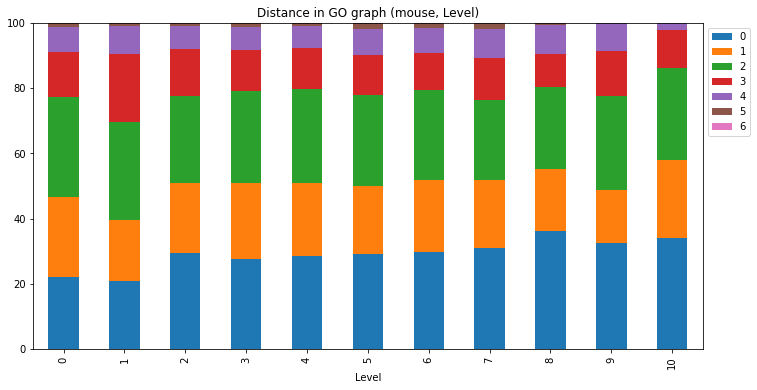

In [595]:
ax = mouse_result_df.drop(['Depth', 'Genes_number', 'Edges_number'], axis=1
                    ).groupby('Level', as_index=False).mean().plot.bar(
    x='Level', 
    stacked=True, 
    title='Distance in GO graph (mouse, Level)',
    figsize=(12,6))

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0, 100)

ax.figure.savefig('../data/08_GO_gene_subset/plots/mouse_level.png')

In [589]:
mouse_result_df.drop(['Level'], axis=1).groupby('Depth').mean()

,Genes_number,Edges_number,0,1,2,3,4,5,6
Depth,,,,,,,,,
0,2378.000000,6885.000000,22.047930,24.458969,30.704430,13.783588,7.697894,1.278141,0.029049
1,652.611111,1664.444444,20.947714,18.537342,30.271212,20.639433,8.690210,0.897840,0.016250
2,286.911392,545.329114,30.414016,22.296882,25.315475,13.743725,7.255287,0.864043,0.110572
3,178.927885,319.274038,28.310301,23.063689,28.677547,12.387840,6.654887,0.888686,0.017050
4,134.585302,222.461942,28.744729,22.640998,30.354000,11.748815,5.762323,0.737111,0.012025
5,99.924612,150.527716,29.729039,21.863687,27.558469,12.491151,6.794421,1.442612,0.120621
6,71.505543,81.419069,29.598303,21.552728,28.212228,11.317801,7.089856,2.228384,0.000700
7,51.829457,44.922481,27.625136,22.533291,27.342992,12.592636,8.636614,1.268995,0.000337
8,45.767790,43.449438,29.483982,18.541650,26.981310,12.059912,11.059118,1.873525,0.000503


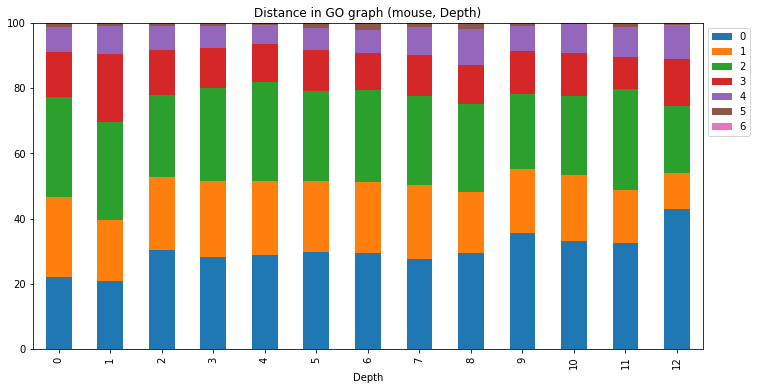

In [597]:
ax = mouse_result_df.drop(['Level', 'Genes_number', 'Edges_number'], axis=1
                    ).groupby('Depth', as_index=False).mean().plot.bar(
    x='Depth', 
    stacked=True, 
    title='Distance in GO graph (mouse, Depth)',
    figsize=(12,6))

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0, 100)

ax.figure.savefig('../data/08_GO_gene_subset/plots/mouse_depth.png')

# 2. GO gene clustering search
## 2.1. Load data

In [506]:
# Create dict level : list with genes lists for new_level
# if less than 10 genes -- do not add to dict

def get_all_terminal_names(tree, dict_for_results=defaultdict(list), level=0):
    if len(tree.get_leaf_names()) > 10:
        dict_for_results[level].append(tree.get_leaf_names())
        new_level = level + 1

        for cild in tree.get_children(): 
            get_all_terminal_names(cild, dict_for_results, new_level)

In [507]:
human_GRN = pd.read_csv('../data/08_GO_gene_subset/ages_lists/human_GRN_iddistances.csv')
human_GRN[['TF_ID', 'Target_ID']] = human_GRN[['TF_ID', 'Target_ID']].astype(str)
human_GRN = human_GRN[['TF_ID', 'Tf_age', 'TF_age_int', 'Target_ID', 'Tg_age', 'Tg_age_int', 'age_length']].drop_duplicates()

mouse_GRN = pd.read_csv('../data/08_GO_gene_subset/ages_lists/mouse_GRN_iddistances.csv')
mouse_GRN[['TF_ID', 'Target_ID']] = mouse_GRN[['TF_ID', 'Target_ID']].astype(str)
mouse_GRN = mouse_GRN[['TF_ID', 'Tf_age', 'TF_age_int', 'Target_ID', 'Tg_age', 'Tg_age_int', 'age_length']].drop_duplicates()

### 2.1.1. Human

In [508]:
human_tree_complete = Tree("../data/07_GO/dendrograms/humanBP_dend_complete.tree")
human_tree_ward = Tree("../data/07_GO/dendrograms/humanBP_dend_ward.tree")

human_tcompl_level = defaultdict(list)
human_tward_level = defaultdict(list)

get_all_terminal_names(human_tree_complete, human_tcompl_level)
get_all_terminal_names(human_tree_ward, human_tward_level)

In [401]:
##### for slides:

In [402]:
list_ = ['1586','23493', '2626', '1482', '9734']

human_tree_ward.prune(list_)
print(human_tree_ward)


      /-9734
     |
   /-|      /-23493
  |  |   /-|
  |   \-|   \-2626
--|     |
  |      \-1482
  |
   \-1586


In [403]:
list_ = ['1586','23493', '2626', '1482', '9734']
human_GRN[human_GRN['TF_ID'].isin(list_) &
          human_GRN['Target_ID'].isin(list_)].reset_index()[['TF_ID', 'Tf_age', 'TF_age_int', 'Target_ID', 'Tg_age', 'Tg_age_int', 'age_length']]

,TF_ID,Tf_age,TF_age_int,Target_ID,Tg_age,Tg_age_int,age_length
0,2626,Eukaryota,2,1586,cellular organisms,1,1
1,2626,Eukaryota,2,9734,cellular organisms,1,1
2,23493,Eumetazoa,4,2626,Eukaryota,2,2
3,1482,Eumetazoa,4,2626,Eukaryota,2,2


In [404]:
list_n = [1586, 23493, 2626, 1482, 9734]
sem_matrix = pd.read_csv('../data/07_GO/human_sim_BP.txt', sep=' ')
sem_matrix.loc[list_n][list_]

,1586,23493,2626,1482,9734
1586,1.000,0.163,0.163,0.151,0.155
23493,0.163,1.000,0.629,0.680,0.499
2626,0.163,0.629,1.000,0.664,0.435
1482,0.151,0.680,0.664,1.000,0.469
9734,0.155,0.499,0.435,0.469,1.000


### 2.1.1. Mouse

In [509]:
mouse_tree_complete = Tree("../data/07_GO/dendrograms/mouseBP_dend_complete.tree")
mouse_tree_ward = Tree("../data/07_GO/dendrograms/mouseBP_dend_ward.tree")

mouse_tcompl_level = defaultdict(list)
mouse_tward_level = defaultdict(list)

get_all_terminal_names(mouse_tree_complete, mouse_tcompl_level)
get_all_terminal_names(mouse_tree_ward, mouse_tward_level)

## 2.2. Create df with metric

### 2.2.1. Human

In [510]:
# human_tree_complete

# Create dataframe with distance metric
# select small GRN for GO term - сontains only GO terms with more than 10 genes.

human_resdf_tcompl = pd.DataFrame(columns = ['Level', 'SubLevel', 'Genes_number', 'Edges_number',
                                             0, 1, 2, 3, 4, 5, 6])
row_index = 0

for level in human_tcompl_level:
    # print(level, len(human_tcompl_level[level]))
    i = 0  # sublevel

    for gene_set in human_tcompl_level[level]:
        temp_GRN = select_subnet(gene_set, human_GRN)
        max_distance = human_GRN.age_length.max()
        distance_series = distance_calculation(temp_GRN, max_distance)

        if distance_series is not None:
            temp_row = [level, 
                        i,
                        len(gene_set), 
                        temp_GRN.shape[0]]
            temp_row.extend(distance_series.tolist())
            human_resdf_tcompl.loc[row_index] = temp_row

            i += 1
            row_index += 1
                

human_resdf_tcompl = human_resdf_tcompl.rename(columns={0: '0'})
human_resdf_tcompl

,Level,SubLevel,Genes_number,Edges_number,0,1,2,3,4,5,6
0,0.0,0.0,2760.0,8207.0,21.091751,26.916047,28.195443,16.680882,5.848666,1.181918,0.085293
1,1.0,0.0,2712.0,8089.0,21.003832,27.024354,28.174064,16.714056,5.859810,1.137347,0.086537
2,2.0,0.0,1654.0,583.0,17.324185,32.246998,28.301887,14.751286,5.660377,1.372213,0.343053
3,2.0,1.0,1058.0,2832.0,23.446328,27.259887,27.542373,14.865819,5.720339,1.129944,0.035311
4,3.0,0.0,647.0,107.0,14.953271,35.514019,26.168224,17.757009,4.672897,0.934579,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
160,12.0,5.0,12.0,1.0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
161,13.0,0.0,15.0,1.0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
162,13.0,1.0,15.0,8.0,50.000000,25.000000,12.500000,12.500000,0.000000,0.000000,0.000000
163,13.0,2.0,17.0,2.0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [511]:
# human_tree_ward

# Create dataframe with distance metric
# select small GRN for GO term - сontains only GO terms with more than 10 genes.

human_resdf_tward = pd.DataFrame(columns = ['Level', 'SubLevel', 'Genes_number', 'Edges_number',
                                             0, 1, 2, 3, 4, 5, 6])
row_index = 0

for level in human_tward_level:
    # print(level, len(human_tward_level[level]))
    i = 0  # sublevel

    for gene_set in human_tward_level[level]:
        temp_GRN = select_subnet(gene_set, human_GRN)
        max_distance = human_GRN.age_length.max()
        distance_series = distance_calculation(temp_GRN, max_distance)

        if distance_series is not None:
            temp_row = [level, i, len(gene_set), temp_GRN.shape[0]]            
            temp_row.extend(distance_series.tolist())

            human_resdf_tward.loc[row_index] = temp_row

            i += 1
            row_index += 1

human_resdf_tward['Level'] = human_resdf_tward['Level'].astype(int)
human_resdf_tward

,Level,SubLevel,Genes_number,Edges_number,0,1,2,3,4,5,6
0,0,0.0,2760.0,8207.0,21.091751,26.916047,28.195443,16.680882,5.848666,1.181918,0.085293
1,1,0.0,1095.0,2993.0,24.089542,27.363849,27.129970,14.734380,5.479452,1.169395,0.033411
2,1,1.0,1665.0,576.0,17.187500,32.118056,27.777778,14.930556,6.076389,1.562500,0.347222
3,2,0.0,792.0,2107.0,22.259136,28.476507,25.913621,15.709540,6.312292,1.328904,0.000000
4,2,1.0,303.0,92.0,33.695652,17.391304,38.043478,7.608696,1.086957,2.173913,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
159,11,2.0,12.0,6.0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
160,11,3.0,22.0,1.0,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
161,11,4.0,11.0,1.0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
162,12,0.0,11.0,2.0,50.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000


### 2.2.2. Mouse

In [512]:
# mouse_tree_complete
mouse_resdf_tcompl = pd.DataFrame(columns = ['Level', 'SubLevel', 'Genes_number', 'Edges_number',
                                             0, 1, 2, 3, 4, 5, 6])
row_index = 0

for level in mouse_tcompl_level:
    i = 0  # sublevel
    for gene_set in mouse_tcompl_level[level]:
        temp_GRN = select_subnet(gene_set, mouse_GRN)
        max_distance = mouse_GRN.age_length.max()
        distance_series = distance_calculation(temp_GRN, max_distance)

        if distance_series is not None:
            temp_row = [level, 
                        i,
                        len(gene_set), 
                        temp_GRN.shape[0]]
            temp_row.extend(distance_series.tolist())
            mouse_resdf_tcompl.loc[row_index] = temp_row

            i += 1
            row_index += 1

            
mouse_resdf_tcompl = mouse_resdf_tcompl.rename(columns={0: '0'})
mouse_resdf_tcompl

,Level,SubLevel,Genes_number,Edges_number,0,1,2,3,4,5,6
0,0.0,0.0,2370.0,6312.0,22.211660,24.762357,30.671736,13.418885,7.588720,1.314956,0.031686
1,1.0,0.0,2355.0,6292.0,22.218690,24.761602,30.657978,13.413859,7.596949,1.319135,0.031786
2,2.0,0.0,2346.0,6270.0,22.232855,24.784689,30.653907,13.429027,7.543860,1.323764,0.031898
3,3.0,0.0,910.0,1720.0,33.313953,28.372093,30.058140,4.941860,2.965116,0.290698,0.058140
4,3.0,1.0,1436.0,1248.0,17.067308,20.993590,26.522436,19.791667,13.381410,2.163462,0.080128
...,...,...,...,...,...,...,...,...,...,...,...
155,14.0,1.0,22.0,15.0,20.000000,26.666667,26.666667,13.333333,13.333333,0.000000,0.000000
156,14.0,2.0,15.0,1.0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
157,15.0,0.0,29.0,8.0,12.500000,12.500000,75.000000,0.000000,0.000000,0.000000,0.000000
158,15.0,1.0,12.0,12.0,25.000000,33.333333,25.000000,8.333333,8.333333,0.000000,0.000000


In [513]:
# mouse_tree_ward
mouse_resdf_tward = pd.DataFrame(columns = ['Level', 'SubLevel', 'Genes_number', 'Edges_number',
                                             0, 1, 2, 3, 4, 5, 6])
row_index = 0

for level in mouse_tward_level:
    # print(level, len(human_tward_level[level]))
    i = 0  # sublevel

    for gene_set in mouse_tward_level[level]:
        temp_GRN = select_subnet(gene_set, mouse_GRN)
        max_distance = mouse_GRN.age_length.max()
        distance_series = distance_calculation(temp_GRN, max_distance)

        if distance_series is not None:
            temp_row = [level, i, len(gene_set), temp_GRN.shape[0]]            
            temp_row.extend(distance_series.tolist())

            mouse_resdf_tward.loc[row_index] = temp_row

            i += 1
            row_index += 1


mouse_resdf_tward['Level'] = mouse_resdf_tward['Level'].astype(int)
mouse_resdf_tward

,Level,SubLevel,Genes_number,Edges_number,0,1,2,3,4,5,6
0,0,0.0,2370.0,6312.0,22.211660,24.762357,30.671736,13.418885,7.588720,1.314956,0.031686
1,1,0.0,1023.0,48.0,27.083333,14.583333,14.583333,16.666667,18.750000,6.250000,2.083333
2,1,1.0,1347.0,3954.0,26.074861,26.024279,30.677795,9.838139,6.499747,0.859889,0.025291
3,2,0.0,712.0,35.0,25.714286,20.000000,11.428571,17.142857,20.000000,5.714286,0.000000
4,2,1.0,779.0,2169.0,24.942370,22.498847,32.411249,10.880590,7.929922,1.337022,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
141,11,1.0,20.0,6.0,50.000000,16.666667,16.666667,0.000000,16.666667,0.000000,0.000000
142,11,2.0,12.0,3.0,33.333333,0.000000,66.666667,0.000000,0.000000,0.000000,0.000000
143,11,3.0,16.0,3.0,33.333333,33.333333,33.333333,0.000000,0.000000,0.000000,0.000000
144,11,4.0,12.0,1.0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 2.3.  Plot results
### 2.3.1. Human

In [455]:
human_resdf_tcompl_3 = human_resdf_tcompl[human_resdf_tcompl.Edges_number > 2]
human_resdf_tcompl_3.drop(['SubLevel'], axis=1).groupby('Level').mean()

,Genes_number,Edges_number,0,1,2,3,4,5,6
Level,,,,,,,,,
0.0,2760.000000,8207.000000,21.091751,26.916047,28.195443,16.680882,5.848666,1.181918,0.085293
1.0,2712.000000,8089.000000,21.003832,27.024354,28.174064,16.714056,5.859810,1.137347,0.086537
2.0,1356.000000,1707.500000,20.385256,29.753443,27.922130,14.808553,5.690358,1.251078,0.189182
3.0,894.000000,1026.000000,20.745100,30.277559,26.840990,15.160312,5.612907,1.184436,0.178696
4.0,535.800000,389.800000,23.031051,29.807893,27.085777,13.916965,5.593386,0.564929,0.000000
5.0,333.250000,145.000000,22.752950,33.071671,24.369261,14.360423,5.117429,0.328266,0.000000
6.0,220.454545,77.636364,29.936805,28.115090,25.605242,13.206960,2.907636,0.228267,0.000000
7.0,139.937500,35.375000,28.608672,30.500179,28.225478,9.288765,3.215657,0.161249,0.000000
8.0,105.461538,22.000000,27.913802,22.272429,30.612904,14.164820,5.036045,0.000000,0.000000


(0.0, 100.0)

<Figure size 1440x1800 with 0 Axes>

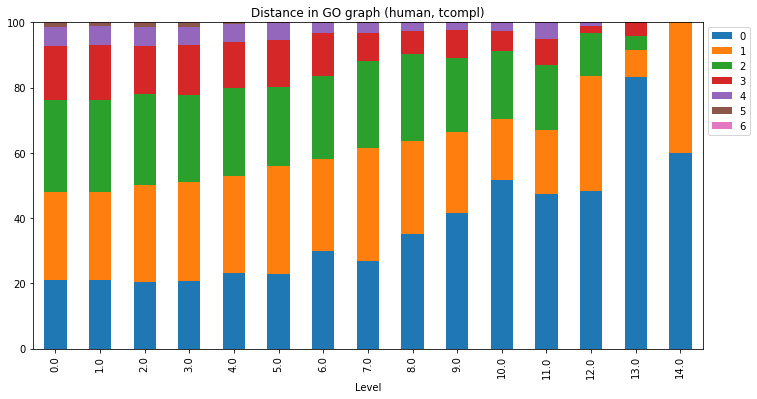

In [456]:
fig = plt.figure()

ax = human_resdf_tcompl.drop(['SubLevel', 'Genes_number', 'Edges_number'], axis=1
                        ).groupby('Level', as_index=False).mean().plot.bar(
    x='Level', 
    stacked=True, 
    title='Distance in GO graph (human, tcompl)',
    figsize=(12,6))

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0, 100)

#ax.figure.savefig('../data/08_GO_gene_subset/plots/human_tcompl_level.png')

(0.0, 100.0)

<Figure size 1440x1800 with 0 Axes>

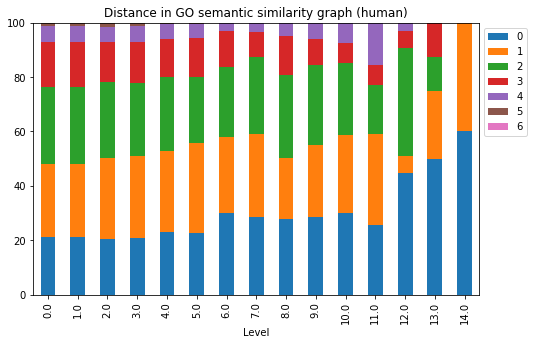

In [457]:
fig = plt.figure()

ax = human_resdf_tcompl_3.drop(['SubLevel', 'Genes_number', 'Edges_number'], axis=1
                        ).groupby('Level', as_index=False).mean().plot.bar(
    x='Level', 
    stacked=True, 
    title='Distance in GO semantic similarity graph (human)', # tcompl
    figsize=(8,5))

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0, 100)

#ax.figure.savefig('../data/08_GO_gene_subset/plots/human_tcompl_level.png')

In [458]:
human_resdf_tward_3 = human_resdf_tward[human_resdf_tward.Edges_number > 2]

In [459]:
human_resdf_tward.drop(['SubLevel'], axis=1).groupby('Level').mean()

,Genes_number,Edges_number,0,1,2,3,4,5,6
Level,,,,,,,,,
0,2760.000000,8207.000000,21.091751,26.916047,28.195443,16.680882,5.848666,1.181918,0.085293
1,1380.000000,1784.500000,20.638521,29.740952,27.453874,14.832468,5.777920,1.365948,0.190317
2,690.000000,624.250000,23.708636,28.769845,29.412410,12.680396,4.108564,1.209038,0.111111
3,388.857143,179.571429,23.884508,27.421792,30.074618,12.966820,5.133485,0.518778,0.000000
4,208.153846,58.538462,23.637126,28.495791,31.500815,11.159486,4.796985,0.409797,0.000000
5,114.954545,22.863636,27.702464,30.025964,25.679195,12.071703,4.445627,0.075048,0.000000
6,73.250000,10.928571,32.247539,21.532752,29.119373,11.502998,5.478025,0.119314,0.000000
7,48.428571,6.035714,31.490565,29.047565,27.039715,5.151022,3.658176,3.612957,0.000000
8,33.652174,5.304348,42.706824,30.419686,17.028986,6.243961,3.532609,0.067935,0.000000


<Figure size 1440x1800 with 0 Axes>

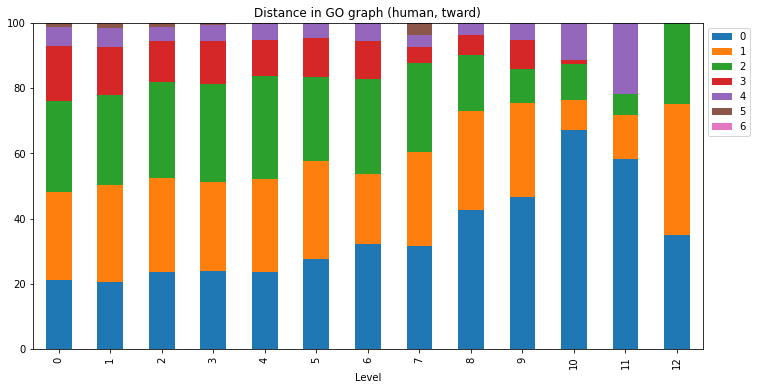

In [460]:
fig = plt.figure()

ax = human_resdf_tward.drop(['SubLevel', 'Genes_number', 'Edges_number'], axis=1
                        ).groupby('Level', as_index=False).mean().plot.bar(
    x='Level', 
    stacked=True, 
    title='Distance in GO graph (human, tward)',
    figsize=(12,6))

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0, 100)

ax.figure.savefig('../data/08_GO_gene_subset/plots/human_tward_level.png')

/tmp/ipykernel_84789/3203496002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_resdf_tward_3['E:G'] = human_resdf_tward_3.Edges_number / human_resdf_tward_3.Genes_number


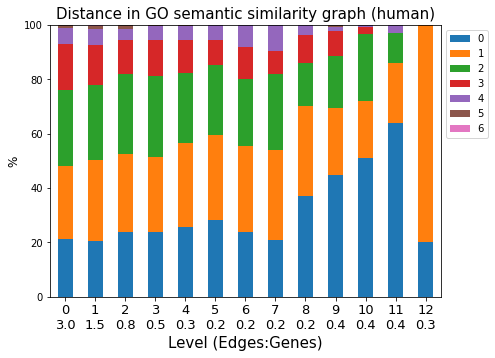

In [538]:
human_resdf_tward_3['E:G'] = human_resdf_tward_3.Edges_number / human_resdf_tward_3.Genes_number
summary = human_resdf_tward_3.groupby('Level', as_index=False).mean()

xlabels = [str(i) for i in range(0, 13)]
x_axis_labels = []

for label in xlabels:
    x_axis_labels.append(f'{label}\n{round(summary[summary.Level == int(label)]["E:G"].iloc[0], 1)}')
    
x_axis_labels

ax = summary.drop(['SubLevel', 'Genes_number', 'Edges_number', 'E:G'], 
                  axis=1).plot.bar(
    x='Level', 
    stacked=True, 
    #title='Distance in GO semantic similarity graph (mouse)', # tward
    figsize=(7,5),
    #xticklabels=x_axis_labels
)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0, 100)
ax.axes.set_title("Distance in GO semantic similarity graph (human)",fontsize=15)
ax.set_xlabel("Level (Edges:Genes)",fontsize=15)
ax.set_ylabel("%",fontsize=12)
ax.set_xticklabels(x_axis_labels)
ax.tick_params(axis='x', rotation=360, labelsize=13)

<Figure size 1440x1800 with 0 Axes>

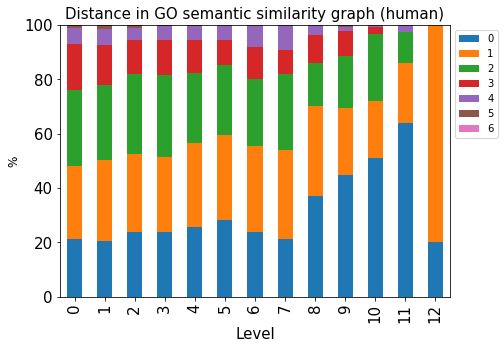

In [461]:
fig = plt.figure()

ax = human_resdf_tward_3.drop(['SubLevel', 'Genes_number', 'Edges_number'], axis=1
                        ).groupby('Level', as_index=False).mean().plot.bar(
    x='Level', 
    stacked=True, 
    #title='Distance in GO semantic similarity graph (human)',  # tward
    figsize=(7,5))

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0, 100)
ax.axes.set_title("Distance in GO semantic similarity graph (human)",fontsize=15)
ax.set_xlabel("Level",fontsize=15)
ax.set_ylabel("%",fontsize=12)
ax.tick_params(labelsize=15)

ax.figure.savefig('../data/08_GO_gene_subset/plots/human_tward_level.png')

### 2.3.2. Mouse

In [514]:
mouse_resdf_tcompl_3 = mouse_resdf_tcompl[mouse_resdf_tcompl.Edges_number > 2]
mouse_resdf_tcompl.drop(['SubLevel'], axis=1).groupby('Level').mean()

,Genes_number,Edges_number,0,1,2,3,4,5,6
Level,,,,,,,,,
0.0,2370.000000,6312.000000,22.211660,24.762357,30.671736,13.418885,7.588720,1.314956,0.031686
1.0,2355.000000,6292.000000,22.218690,24.761602,30.657978,13.413859,7.596949,1.319135,0.031786
2.0,2346.000000,6270.000000,22.232855,24.784689,30.653907,13.429027,7.543860,1.323764,0.031898
3.0,1173.000000,1484.000000,25.190631,24.682841,28.290288,12.366764,8.173263,1.227080,0.069134
4.0,586.500000,570.000000,23.055424,24.243887,27.045003,12.445601,10.673750,1.449378,1.086957
5.0,341.166667,232.666667,27.490952,23.448379,22.692561,9.020575,16.071635,1.275899,0.000000
6.0,203.700000,98.700000,25.815191,25.672348,20.456924,6.753565,11.151537,10.150436,0.000000
7.0,120.000000,54.000000,37.729146,20.643093,19.083396,4.987250,11.070660,6.486455,0.000000
8.0,79.000000,28.727273,41.702270,22.181865,20.537555,4.732772,6.244987,4.600551,0.000000


<Figure size 1440x1800 with 0 Axes>

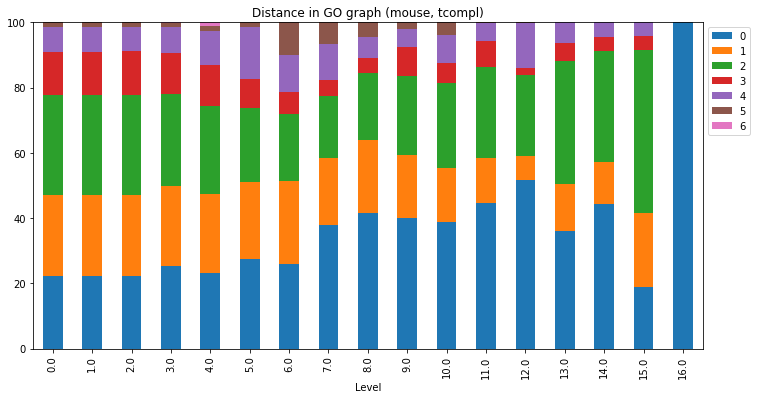

In [463]:
fig = plt.figure()

ax = mouse_resdf_tcompl.drop(['SubLevel', 'Genes_number', 'Edges_number'], axis=1
                        ).groupby('Level', as_index=False).mean().plot.bar(
    x='Level', 
    stacked=True, 
    title='Distance in GO graph (mouse, tcompl)',
    figsize=(12,6))

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0, 100)

ax.figure.savefig('../data/08_GO_gene_subset/plots/mouse_tcompl_level.png')

<Figure size 1440x1800 with 0 Axes>

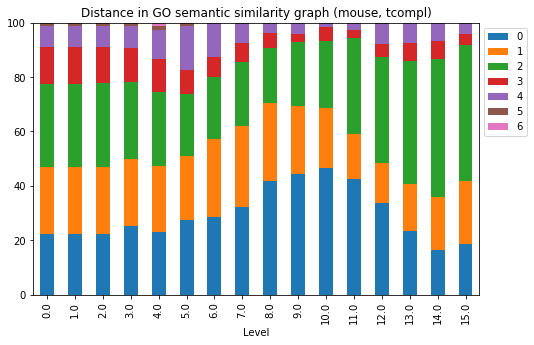

In [464]:
fig = plt.figure()

ax = mouse_resdf_tcompl_3.drop(['SubLevel', 'Genes_number', 'Edges_number'], axis=1
                        ).groupby('Level', as_index=False).mean().plot.bar(
    x='Level', 
    stacked=True, 
    title='Distance in GO semantic similarity graph (mouse, tcompl)',
    figsize=(8,5))

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0, 100)

ax.figure.savefig('../data/08_GO_gene_subset/plots/mouse_tcompl_level.png')

In [515]:
mouse_resdf_tward_3 = mouse_resdf_tward[mouse_resdf_tward.Edges_number > 2]
mouse_resdf_tward.drop(['SubLevel'], axis=1).groupby('Level').mean()

,Genes_number,Edges_number,0,1,2,3,4,5,6
Level,,,,,,,,,
0,2370.000000,6312.000000,22.211660,24.762357,30.671736,13.418885,7.588720,1.314956,0.031686
1,1185.000000,2001.000000,26.579097,20.303806,22.630564,13.252403,12.624874,3.554944,1.054312
2,686.333333,852.000000,28.722673,25.245828,22.851910,10.950998,9.878156,2.350436,0.000000
3,437.000000,356.500000,28.045986,26.052226,21.522646,13.415795,8.936535,2.026811,0.000000
4,218.500000,116.500000,22.738203,25.632004,21.208448,7.525035,16.872465,6.023845,0.000000
5,134.000000,57.750000,25.917490,21.641831,17.307450,10.853108,14.718924,9.561197,0.000000
6,78.000000,24.052632,41.809499,18.427508,17.243944,6.655432,8.877053,6.986564,0.000000
7,44.777778,11.185185,44.300448,15.263983,20.442873,8.293943,6.623307,5.075446,0.000000
8,27.633333,6.100000,46.213523,17.910714,20.410791,8.548840,5.805021,1.111111,0.000000


<Figure size 1440x1800 with 0 Axes>

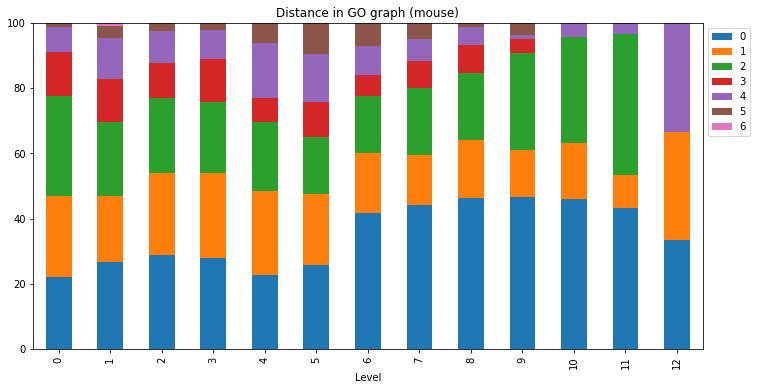

In [466]:
fig = plt.figure()

ax = mouse_resdf_tward.drop(['SubLevel', 'Genes_number', 'Edges_number'], axis=1
                        ).groupby('Level', as_index=False).mean().plot.bar(
    x='Level', 
    stacked=True, 
    title='Distance in GO graph (mouse)', # tward
    figsize=(12,6))

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0, 100)

ax.figure.savefig('../data/08_GO_gene_subset/plots/mouse_tward_level.png')

/tmp/ipykernel_84789/764295684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse_resdf_tward_3['E:G'] = mouse_resdf_tward_3.Edges_number / mouse_resdf_tward_3.Genes_number


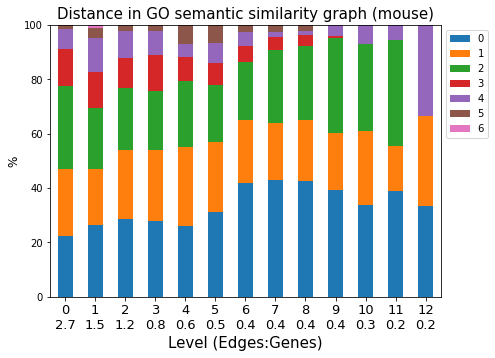

In [537]:
mouse_resdf_tward_3['E:G'] = mouse_resdf_tward_3.Edges_number / mouse_resdf_tward_3.Genes_number
summary = mouse_resdf_tward_3.groupby('Level', as_index=False).mean()

xlabels = [str(i) for i in range(0, 13)]
x_axis_labels = []

for label in xlabels:
    x_axis_labels.append(f'{label}\n{round(summary[summary.Level == int(label)]["E:G"].iloc[0], 1)}')
    
x_axis_labels

ax = summary.drop(['SubLevel', 'Genes_number', 'Edges_number', 'E:G'], 
                  axis=1).plot.bar(
    x='Level', 
    stacked=True, 
    #title='Distance in GO semantic similarity graph (mouse)', # tward
    figsize=(7,5),
    #xticklabels=x_axis_labels
)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0, 100)
ax.axes.set_title("Distance in GO semantic similarity graph (mouse)",fontsize=15)
ax.set_xlabel("Level (Edges:Genes)",fontsize=15)
ax.set_ylabel("%",fontsize=12)
ax.set_xticklabels(x_axis_labels)
ax.tick_params(axis='x', rotation=360, labelsize=13)

#ax.figure.savefig('../data/08_GO_gene_subset/plots/mouse_tward_level.png')

## Statistics
### Human

In [468]:
human_resdf_tcompl_3 = human_resdf_tcompl[human_resdf_tcompl.Edges_number > 2]
human_resdf_tward_3 = human_resdf_tward[human_resdf_tward.Edges_number > 2]

mouse_resdf_tward_3 = mouse_resdf_tward[mouse_resdf_tward.Edges_number > 2]
mouse_resdf_tcompl_3 = mouse_resdf_tcompl[mouse_resdf_tcompl.Edges_number > 2]

In [356]:
a = human_resdf_tcompl_3.drop(['SubLevel'], axis=1).groupby('Level').mean()
a['co'] = a.Genes_number / a.Edges_number
a

,Genes_number,Edges_number,0,1,2,3,4,5,6,co
Level,,,,,,,,,,
0.0,2760.000000,8207.000000,21.091751,26.916047,28.195443,16.680882,5.848666,1.181918,0.085293,0.336298
1.0,2712.000000,8089.000000,21.003832,27.024354,28.174064,16.714056,5.859810,1.137347,0.086537,0.335270
2.0,1356.000000,1707.500000,20.385256,29.753443,27.922130,14.808553,5.690358,1.251078,0.189182,0.794143
3.0,894.000000,1026.000000,20.745100,30.277559,26.840990,15.160312,5.612907,1.184436,0.178696,0.871345
4.0,535.800000,389.800000,23.031051,29.807893,27.085777,13.916965,5.593386,0.564929,0.000000,1.374551
5.0,333.250000,145.000000,22.752950,33.071671,24.369261,14.360423,5.117429,0.328266,0.000000,2.298276
6.0,220.454545,77.636364,29.936805,28.115090,25.605242,13.206960,2.907636,0.228267,0.000000,2.839578
7.0,139.937500,35.375000,28.608672,30.500179,28.225478,9.288765,3.215657,0.161249,0.000000,3.955830
8.0,105.461538,22.000000,27.913802,22.272429,30.612904,14.164820,5.036045,0.000000,0.000000,4.793706


In [357]:
a = human_resdf_tward_3.drop(['SubLevel'], axis=1).groupby('Level').mean()
a['co'] = a.Genes_number / a.Edges_number
a

,Genes_number,Edges_number,0,1,2,3,4,5,6,co
Level,,,,,,,,,,
0.0,2760.000000,8207.000000,21.091751,26.916047,28.195443,16.680882,5.848666,1.181918,0.085293,0.336298
1.0,1380.000000,1784.500000,20.638521,29.740952,27.453874,14.832468,5.777920,1.365948,0.190317,0.773326
2.0,690.000000,624.250000,23.708636,28.769845,29.412410,12.680396,4.108564,1.209038,0.111111,1.105326
3.0,388.857143,179.571429,23.884508,27.421792,30.074618,12.966820,5.133485,0.518778,0.000000,2.165473
4.0,219.583333,63.333333,25.606886,30.870440,25.792550,12.089443,5.196734,0.443947,0.000000,3.467105
5.0,132.000000,27.722222,28.303012,31.142845,25.830127,9.198748,5.433544,0.091725,0.000000,4.761523
6.0,77.789474,15.473684,23.838478,31.732476,24.491707,11.688628,8.072879,0.175832,0.000000,5.027211
7.0,65.181818,13.545455,21.066893,33.030165,27.919275,8.566237,9.311722,0.105708,0.000000,4.812081
8.0,45.000000,11.444444,36.917438,33.294753,15.740741,10.401235,3.472222,0.173611,0.000000,3.932039


In [358]:
a = mouse_resdf_tward_3.drop(['SubLevel'], axis=1).groupby('Level').mean()
a['co'] = a.Genes_number / a.Edges_number
a

,Genes_number,Edges_number,0,1,2,3,4,5,6,co
Level,,,,,,,,,,
0.0,2370.000000,6312.000000,22.211660,24.762357,30.671736,13.418885,7.588720,1.314956,0.031686,0.375475
1.0,1185.000000,2001.000000,26.579097,20.303806,22.630564,13.252403,12.624874,3.554944,1.054312,0.592204
2.0,686.333333,852.000000,28.722673,25.245828,22.851910,10.950998,9.878156,2.350436,0.000000,0.805556
3.0,437.000000,356.500000,28.045986,26.052226,21.522646,13.415795,8.936535,2.026811,0.000000,1.225806
4.0,217.285714,133.000000,25.986518,29.293719,24.238227,8.600040,4.997103,6.884394,0.000000,1.633727
5.0,138.200000,69.000000,31.100988,25.970197,20.768940,8.023729,7.662709,6.473436,0.000000,2.002899
6.0,76.076923,34.538462,41.875421,23.086357,21.356534,5.881016,5.281846,2.518825,0.000000,2.202673
7.0,43.066667,18.933333,43.074140,20.808503,26.797171,4.929098,1.921952,2.469136,0.000000,2.274648
8.0,28.000000,10.866667,42.427045,22.488095,27.488248,3.764347,1.610043,2.222222,0.000000,2.576687


In [359]:
a = mouse_resdf_tcompl_3.drop(['SubLevel'], axis=1).groupby('Level').mean()
a['co'] = a.Genes_number / a.Edges_number
a

,Genes_number,Edges_number,0,1,2,3,4,5,6,co
Level,,,,,,,,,,
0.0,2370.000000,6312.000000,22.211660,24.762357,30.671736,13.418885,7.588720,1.314956,0.031686,0.375475
1.0,2355.000000,6292.000000,22.218690,24.761602,30.657978,13.413859,7.596949,1.319135,0.031786,0.374285
2.0,2346.000000,6270.000000,22.232855,24.784689,30.653907,13.429027,7.543860,1.323764,0.031898,0.374163
3.0,1173.000000,1484.000000,25.190631,24.682841,28.290288,12.366764,8.173263,1.227080,0.069134,0.790431
4.0,586.500000,570.000000,23.055424,24.243887,27.045003,12.445601,10.673750,1.449378,1.086957,1.028947
5.0,341.166667,232.666667,27.490952,23.448379,22.692561,9.020575,16.071635,1.275899,0.000000,1.466332
6.0,221.333333,109.555556,28.683545,28.524831,22.729915,7.503961,12.390597,0.167151,0.000000,2.020284
7.0,119.000000,78.000000,32.151485,30.026317,23.212213,7.254181,7.011869,0.343935,0.000000,1.525641
8.0,74.200000,61.600000,41.744994,28.800103,20.182621,5.412099,3.738971,0.121212,0.000000,1.204545


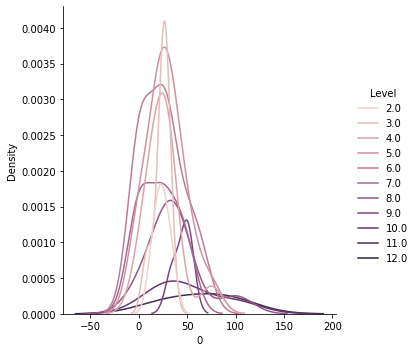

In [354]:
# human
sns.displot(human_resdf_tward_3[(human_resdf_tward_3.Level != 0) & (
    human_resdf_tward_3.Level != 1)], hue="Level", x='0', kind="kde", warn_singular=False)

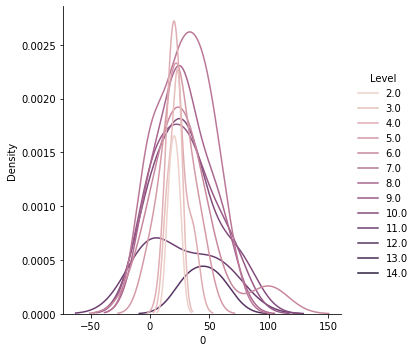

In [346]:
# human
sns.displot(human_resdf_tcompl_3[(human_resdf_tcompl_3.Level != 0) & (
    human_resdf_tcompl_3.Level != 1)], hue="Level", x='0', kind="kde", warn_singular=False)

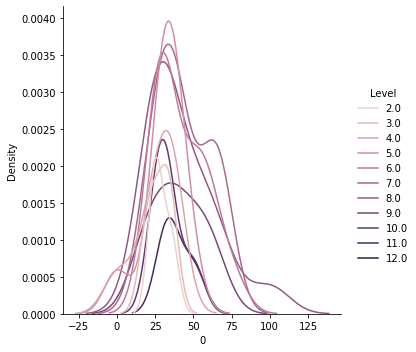

In [347]:
# mouse
sns.displot(mouse_resdf_tward_3[(mouse_resdf_tward_3.Level != 0) & (
    mouse_resdf_tward_3.Level != 1)], hue="Level", x='0', kind="kde", warn_singular=False)

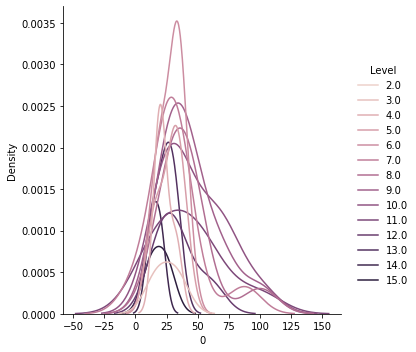

In [348]:
sns.displot(mouse_resdf_tcompl_3[(mouse_resdf_tcompl_3.Level != 0) & (
    mouse_resdf_tcompl_3.Level != 1)], hue="Level", x='0', kind="kde", warn_singular=False)